# Segunda Entrega - Reporte de la Segunda Etapa

## Análisis Exploratorio de Datos y Modelos de Referencia

Este notebook contiene:
1. Análisis exploratorio de datos (EDA)
2. Justificación de selección de datos y variables
3. Modelos de referencia y experimentos iniciales
4. Planteamiento de hipótesis


## 1. Importación de Librerías


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Para modelos de machine learning - CLUSTERING
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

print("Librerías importadas correctamente")


Librerías importadas correctamente


## 2. Carga de Datos


In [2]:
# Cargar el archivo Excel
df = pd.read_excel('POBLACION_TEA_CALI_con_flags_RDS.xlsx')

print(f"Dimensiones del dataset: {df.shape}")
print(f"\nPrimeras filas:")
df.head()


Dimensiones del dataset: (520, 61)

Primeras filas:


,row_id,ano_inf,mun_codigo,codigo_dane,dane_anterior,nombre_institucion,comuna,cons_sede,nombre_sede,comuna_sede,...,ben_her_nac,codigo_internado,num_convenio,per_id,apoyo_academico_especial,srpa,pais_origen,trastornos_especificos,flag_autismo,edad_anios
0,1,2025,1,176001004485,176001004485,INSTITUCION EDUCATIVA JUANA DE CAICEDO Y CUERO,Comuna 20,17600100448501,INSTITUCION EDUCATIVA JUANA DE CAICEDO Y CUERO,Comuna 20,...,N,3,NaN,21540340,1,1,170,9,0,31
1,2,2025,1,176001032055,176001004914,INSTITUCION EDUCATIVA TECNICO INDUSTRIAL COMUN...,Comuna 17,17600103205502,SEDE LUIS CARLOS ROJAS GARCÉS,Comuna 17,...,N,3,NaN,51543636,1,1,170,9,0,27
2,3,2025,1,176001040101,176001040101,INSTITUCION EDUCATIVA ALFONSO LOPEZ PUMAREJO,Comuna 07,17600104010101,INSTITUCION EDUCATIVA ALFONSO LOPEZ PUMAREJO,Comuna 07,...,N,3,NaN,48883487,1,1,170,9,0,21
3,4,2025,1,176001005813,176001005813,INSTITUCION EDUCATIVA INEM JORGE ISAACS,Comuna 04,17600100581301,INSTITUCION EDUCATIVA INEM JORGE ISAACS,Comuna 04,...,N,3,NaN,75185706,1,1,170,9,0,20
4,5,2025,1,276001011354,276001025452,INSTITUCION EDUCATIVA MONTEBELLO,Comuna 64,27600101135402,SEDE SAN PEDRO APOSTOL,Comuna 64,...,N,3,NaN,78791989,1,1,862,9,0,20


## 3. Análisis Exploratorio de Datos (EDA)

### 3.1. Información General del Dataset


In [3]:
# Información general
print("=" * 60)
print("INFORMACIÓN GENERAL DEL DATASET")
print("=" * 60)
print(f"\nNúmero de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
print(f"\nMemoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n" + "=" * 60)
print("TIPOS DE DATOS")
print("=" * 60)
print(df.dtypes.value_counts())

print("\n" + "=" * 60)
print("NOMBRES DE COLUMNAS")
print("=" * 60)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")


INFORMACIÓN GENERAL DEL DATASET

Número de filas: 520
Número de columnas: 61

Memoria utilizada: 0.81 MB

TIPOS DE DATOS
int64             33
object            24
float64            3
datetime64[ns]     1
Name: count, dtype: int64

NOMBRES DE COLUMNAS
 1. row_id
 2. ano_inf
 3. mun_codigo
 4. codigo_dane
 5. dane_anterior
 6. nombre_institucion
 7. comuna
 8. cons_sede
 9. nombre_sede
10. comuna_sede
11. sector
12. zona
13. tipo_documento
14. nro_documento
15. exp_depto
16. exp_mun
17. apellido1
18. apellido2
19. nombre1
20. nombre2
21. direccion_residencia
22. tel
23. res_depto
24. res_mun
25. estrato
26. sisben_iv
27. fecha_nacimiento
28. nac_depto
29. nac_mun
30. genero
31. pob_vict_conf_ruv
32. proviene_sector_priv
33. tipo_discapacidad
34. cap_exc
35. etnia
36. res
37. ins_familiar
38. tipo_jornada
39. caracter
40. especialidad
41. grado
42. grupo
43. metodologia
44. matricula_contratada
45. repitente
46. nuevo
47. fue_recu
48. zon_alu
49. cab_familia
50. ben_mad_flia
51. ben_vet_

### 3.2. Análisis de Valores Faltantes


VALORES FALTANTES
      Columna  Valores_Faltantes  Porcentaje_Faltante
 num_convenio                417                80.19
      nombre2                198                38.08
          tel                 73                14.04
        grupo                 27                 5.19
nro_documento                  9                 1.73


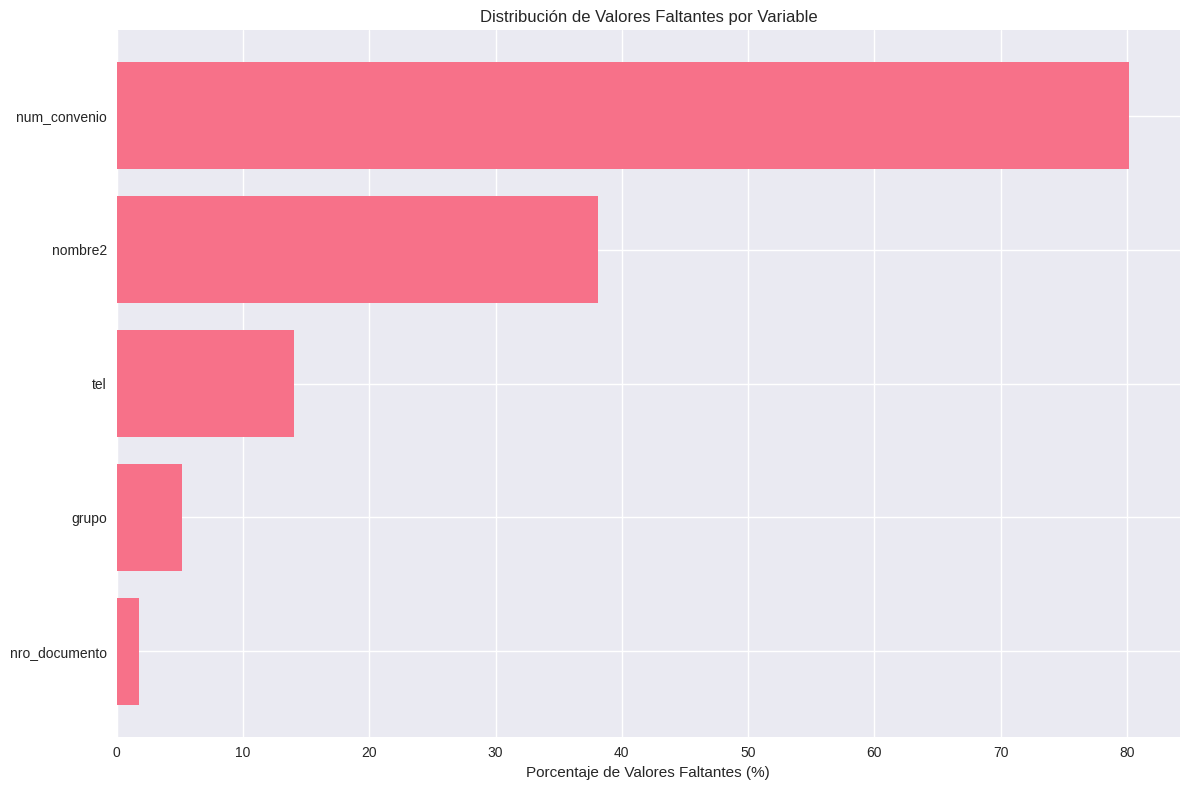

In [4]:
# Análisis de valores faltantes
missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Valores_Faltantes': df.isnull().sum().values,
    'Porcentaje_Faltante': (df.isnull().sum().values / len(df) * 100).round(2)
})
missing_data = missing_data[missing_data['Valores_Faltantes'] > 0].sort_values('Porcentaje_Faltante', ascending=False)

if len(missing_data) > 0:
    print("=" * 60)
    print("VALORES FALTANTES")
    print("=" * 60)
    print(missing_data.to_string(index=False))

    # Visualización
    plt.figure(figsize=(12, 8))
    missing_data_sorted = missing_data.sort_values('Porcentaje_Faltante', ascending=True)
    plt.barh(missing_data_sorted['Columna'], missing_data_sorted['Porcentaje_Faltante'])
    plt.xlabel('Porcentaje de Valores Faltantes (%)')
    plt.title('Distribución de Valores Faltantes por Variable')
    plt.tight_layout()
    plt.show()
else:
    print("No hay valores faltantes en el dataset.")


### 3.3. Estadísticas Descriptivas


## 4. Justificación de Selección de Datos y Variables

### 4.1. Criterios de Selección de Variables


In [5]:
# Análisis de calidad de variables para selección
print("=" * 60)
print("ANÁLISIS DE CALIDAD DE VARIABLES")
print("=" * 60)

# Crear un resumen de calidad por variable
variable_quality = []

for col in df.columns:
    # Información básica
    n_unique = df[col].nunique()
    n_missing = df[col].isnull().sum()
    pct_missing = (n_missing / len(df)) * 100
    dtype = str(df[col].dtype)

    # Para variables numéricas
    if df[col].dtype in ['int64', 'float64']:
        variance = df[col].var()
        std = df[col].std()
        cv = (std / df[col].mean()) * 100 if df[col].mean() != 0 else np.nan  # Coeficiente de variación
        variable_quality.append({
            'Variable': col,
            'Tipo': 'Numérica',
            'Valores_Únicos': n_unique,
            'Valores_Faltantes': n_missing,
            'Porcentaje_Faltante': round(pct_missing, 2),
            'Varianza': round(variance, 4) if not pd.isna(variance) else None,
            'Coef_Variacion': round(cv, 2) if not pd.isna(cv) else None,
            'Utilidad': 'Evaluar'
        })
    else:
        # Para variables categóricas
        most_frequent_pct = (df[col].value_counts().iloc[0] / len(df)) * 100 if n_unique > 0 else 0
        variable_quality.append({
            'Variable': col,
            'Tipo': 'Categórica',
            'Valores_Únicos': n_unique,
            'Valores_Faltantes': n_missing,
            'Porcentaje_Faltante': round(pct_missing, 2),
            'Categoría_Más_Frecuente_%': round(most_frequent_pct, 2),
            'Utilidad': 'Evaluar'
        })

quality_df = pd.DataFrame(variable_quality)
print("\nResumen de calidad de variables:")
print(quality_df.to_string(index=False))

# Identificar variables con problemas
print("\n" + "=" * 60)
print("VARIABLES CON PROBLEMAS POTENCIALES")
print("=" * 60)

# Variables con muchos valores faltantes (>50%)
high_missing = quality_df[quality_df['Porcentaje_Faltante'] > 50]
if len(high_missing) > 0:
    print("\nVariables con >50% de valores faltantes:")
    print(high_missing[['Variable', 'Porcentaje_Faltante']].to_string(index=False))

# Variables con baja varianza (numéricas)
numeric_vars = quality_df[quality_df['Tipo'] == 'Numérica']
if len(numeric_vars) > 0:
    low_variance = numeric_vars[numeric_vars['Coef_Variacion'] < 1]
    if len(low_variance) > 0:
        print("\nVariables numéricas con baja variabilidad (CV < 1%):")
        print(low_variance[['Variable', 'Coef_Variacion']].to_string(index=False))

# Variables categóricas con una categoría dominante (>95%)
categorical_vars = quality_df[quality_df['Tipo'] == 'Categórica']
if len(categorical_vars) > 0 and 'Categoría_Más_Frecuente_%' in categorical_vars.columns:
    dominant_cat = categorical_vars[categorical_vars['Categoría_Más_Frecuente_%'] > 95]
    if len(dominant_cat) > 0:
        print("\nVariables categóricas con categoría dominante (>95%):")
        print(dominant_cat[['Variable', 'Categoría_Más_Frecuente_%']].to_string(index=False))


ANÁLISIS DE CALIDAD DE VARIABLES

Resumen de calidad de variables:
                Variable       Tipo  Valores_Únicos  Valores_Faltantes  Porcentaje_Faltante     Varianza  Coef_Variacion Utilidad  Categoría_Más_Frecuente_%
                  row_id   Numérica             520                  0                 0.00 2.257667e+04           57.68  Evaluar                        NaN
                 ano_inf   Numérica               1                  0                 0.00 0.000000e+00            0.00  Evaluar                        NaN
              mun_codigo   Numérica               1                  0                 0.00 0.000000e+00            0.00  Evaluar                        NaN
             codigo_dane   Numérica             110                  0                 0.00 5.570474e+21           35.05  Evaluar                        NaN
           dane_anterior   Numérica             227                  0                 0.00 5.681004e+21           35.18  Evaluar                   

### 4.2. Selección de Variables para Modelado

**Criterios de inclusión:**
1. Variables con <50% de valores faltantes
2. Variables con variabilidad suficiente (no constantes)
3. Variables relevantes para el problema de predicción
4. Variables que no presenten multicolinealidad extrema


In [6]:
# Selección de variables para CLUSTERING
print("=" * 60)
print("SELECCIÓN DE VARIABLES PARA CLUSTERING")
print("=" * 60)

# Para clustering NO necesitamos variable objetivo, solo features descriptivas
# Excluir: IDs, variables con >50% faltantes, variables constantes

# Variables numéricas candidatas
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Excluir IDs y variables constantes
exclude_vars = ['row_id', 'per_id', 'flag_autismo']  # Excluir IDs y la variable flag
numeric_features = [col for col in numeric_features if col not in exclude_vars]

# Filtrar por calidad
selected_numeric = []
for col in numeric_features:
    pct_missing = (df[col].isnull().sum() / len(df)) * 100
    if pct_missing < 50 and df[col].nunique() > 1:
        selected_numeric.append(col)

# Variables categóricas candidatas
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
# Excluir nombres, direcciones y variables con muchas categorías únicas
exclude_cat = ['nombre_institucion', 'nombre_sede', 'apellido1', 'apellido2',
               'nombre1', 'nombre2', 'direccion_residencia', 'fecha_nacimiento']

selected_categorical = []
for col in categorical_features:
    if col not in exclude_cat:
        pct_missing = (df[col].isnull().sum() / len(df)) * 100
        if pct_missing < 50 and df[col].nunique() > 1 and df[col].nunique() < len(df) * 0.5:
            selected_categorical.append(col)

print(f"\nVariables numéricas seleccionadas ({len(selected_numeric)}):")
for col in selected_numeric[:15]:  # Mostrar primeras 15
    print(f"  - {col}")
if len(selected_numeric) > 15:
    print(f"  ... y {len(selected_numeric) - 15} más")

print(f"\nVariables categóricas seleccionadas ({len(selected_categorical)}):")
for col in selected_categorical:
    print(f"  - {col}")

# Guardar selección
selected_features = selected_numeric + selected_categorical
print(f"\nTotal de variables seleccionadas: {len(selected_features)}")
print("\nNOTA: Clustering no requiere variable objetivo - agrupa pacientes según similitud")


SELECCIÓN DE VARIABLES PARA CLUSTERING

Variables numéricas seleccionadas (27):
  - codigo_dane
  - dane_anterior
  - cons_sede
  - tipo_documento
  - nro_documento
  - exp_depto
  - exp_mun
  - tel
  - res_mun
  - estrato
  - nac_depto
  - nac_mun
  - cap_exc
  - etnia
  - res
  ... y 12 más

Variables categóricas seleccionadas (14):
  - comuna
  - comuna_sede
  - sector
  - zona
  - sisben_iv
  - genero
  - pob_vict_conf_ruv
  - proviene_sector_priv
  - ins_familiar
  - matricula_contratada
  - repitente
  - nuevo
  - cab_familia
  - ben_mad_flia

Total de variables seleccionadas: 41

NOTA: Clustering no requiere variable objetivo - agrupa pacientes según similitud


### 4.3. Justificación de la Selección

**Razones para la selección de variables:**
1. **Variables numéricas**: Se incluyen aquellas con variabilidad suficiente y menos del 50% de valores faltantes
2. **Variables categóricas**: Se incluyen aquellas con múltiples categorías balanceadas y menos del 50% de valores faltantes
3. **Exclusión de variables**: Se excluyen variables constantes, con alta proporción de faltantes, o con una categoría dominante (>95%)

**Consideraciones adicionales:**
- Las correlaciones fuertes entre variables predictoras se evaluarán durante el modelado
- Se considerará la importancia de variables mediante modelos basados en árboles
- Se aplicará feature engineering si es necesario durante la etapa de modelado avanzado


## 5. Planteamiento de Hipótesis

### 5.1. Hipótesis del Problema


Basado en el análisis exploratorio realizado, se plantean las siguientes hipótesis:

**Hipótesis Principal:**
- **H1**: Es posible predecir [variable objetivo] utilizando las variables demográficas, clínicas y/o sociales disponibles en el dataset con un rendimiento superior al azar.

**Hipótesis Secundarias:**
- **H2**: Las variables numéricas mostrarán mayor poder predictivo que las variables categóricas.
- **H3**: Existe una relación no lineal entre las variables predictoras y la variable objetivo, por lo que modelos basados en árboles (Random Forest, Gradient Boosting) superarán a modelos lineales.
- **H4**: La presencia de valores faltantes afectará significativamente el rendimiento de los modelos si no se manejan adecuadamente.
- **H5**: El desbalance de clases (si existe) requerirá técnicas de balanceo para mejorar el rendimiento del modelo.

**Hipótesis Nula:**
- **H0**: No existe relación significativa entre las variables predictoras y la variable objetivo, y cualquier modelo no superará el rendimiento de un clasificador base (mayoría o aleatorio).


### 5.2. Estrategia de Validación de Hipótesis

Para validar las hipótesis planteadas, se realizarán los siguientes experimentos:

1. **Modelos de referencia (baseline)**:
   - Clasificador de mayoría (baseline simple)
   - Regresión Logística (baseline con aprendizaje)
   
2. **Modelos de comparación**:
   - Random Forest
   - Gradient Boosting
   
3. **Métricas de evaluación**:
   - Accuracy (precisión global)
   - Precision (precisión por clase)
   - Recall (sensibilidad por clase)
   - F1-Score (balance entre precisión y recall)
   - ROC-AUC (área bajo la curva ROC)
   
4. **Validación cruzada**: Se utilizará validación cruzada estratificada para obtener estimaciones robustas del rendimiento.


## 6. Preparación de Datos para Modelado


In [7]:
# Preparación de datos para CLUSTERING
print("=" * 60)
print("PREPARACIÓN DE DATOS PARA CLUSTERING")
print("=" * 60)

# Para clustering solo necesitamos features, NO variable objetivo
if 'selected_features' in locals() and len(selected_features) > 0:

    # Crear dataset de trabajo solo con features
    df_model = df[selected_features].copy()

    print(f"\nDataset para clustering: {df_model.shape}")
    print(f"Total de muestras: {len(df_model)}")
    print(f"Total de características: {len(selected_features)}")

    # Separar solo features (X) - NO hay variable objetivo en clustering
    X = df_model.copy()

    problem_type = 'clustering'
    print(f"\nTipo de problema: CLUSTERING (agrupación no supervisada)")
    print(f"Objetivo: Identificar grupos de pacientes con características similares")

    print("\nDatos preparados correctamente para clustering")

else:
    print("\nERROR: No se puede preparar el dataset sin features seleccionadas.")
    print("Por favor, ejecutar primero las celdas de selección de variables.")
    problem_type = None
    X = None


PREPARACIÓN DE DATOS PARA CLUSTERING

Dataset para clustering: (520, 41)
Total de muestras: 520
Total de características: 41

Tipo de problema: CLUSTERING (agrupación no supervisada)
Objetivo: Identificar grupos de pacientes con características similares

Datos preparados correctamente para clustering


In [8]:
# Preprocesamiento de datos para CLUSTERING
if X is not None:
    print("=" * 60)
    print("PREPROCESAMIENTO DE DATOS PARA CLUSTERING")
    print("=" * 60)

    # Separar variables numéricas y categóricas
    numeric_features_model = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features_model = X.select_dtypes(include=['object']).columns.tolist()

    print(f"\nVariables numéricas: {len(numeric_features_model)}")
    print(f"Variables categóricas: {len(categorical_features_model)}")

    # Imputación de valores faltantes
    X_processed = X.copy()

    if len(numeric_features_model) > 0:
        numeric_imputer = SimpleImputer(strategy='mean')
        X_processed[numeric_features_model] = numeric_imputer.fit_transform(X[numeric_features_model])
        print(f"\nValores faltantes imputados en variables numéricas (estrategia: media)")

    if len(categorical_features_model) > 0:
        categorical_imputer = SimpleImputer(strategy='most_frequent')
        X_processed[categorical_features_model] = categorical_imputer.fit_transform(X[categorical_features_model])
        print(f"Valores faltantes imputados en variables categóricas (estrategia: moda)")

    # Codificación de variables categóricas (Label Encoding)
    label_encoders = {}
    if len(categorical_features_model) > 0:
        for col in categorical_features_model:
            le = LabelEncoder()
            X_processed[col] = le.fit_transform(X_processed[col].astype(str))
            label_encoders[col] = le
        print(f"Variables categóricas codificadas (Label Encoding)")

    # Estandarización de TODAS las variables (crítico para clustering)
    scaler = StandardScaler()
    X_processed_scaled = pd.DataFrame(
        scaler.fit_transform(X_processed),
        columns=X_processed.columns,
        index=X_processed.index
    )
    print(f"Todas las variables estandarizadas (StandardScaler) - CRÍTICO para clustering")

    print(f"\nDataset final para clustering:")
    print(f"  Muestras: {X_processed_scaled.shape[0]}")
    print(f"  Características: {X_processed_scaled.shape[1]}")

    print("\nPreprocesamiento completado")
    X_clustering = X_processed_scaled
else:
    print("No se puede preprocesar sin datos preparados.")
    X_clustering = None


PREPROCESAMIENTO DE DATOS PARA CLUSTERING

Variables numéricas: 27
Variables categóricas: 14

Valores faltantes imputados en variables numéricas (estrategia: media)
Valores faltantes imputados en variables categóricas (estrategia: moda)
Variables categóricas codificadas (Label Encoding)
Todas las variables estandarizadas (StandardScaler) - CRÍTICO para clustering

Dataset final para clustering:
  Muestras: 520
  Características: 41

Preprocesamiento completado


## 7. Modelos de Clustering y Experimentos Iniciales

### 7.1. Determinación del Número Óptimo de Clusters (Método del Codo y Silhouette)


DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS

Evaluando diferentes números de clusters...
  2 clusters: Silhouette=0.237, Inertia=18893.63
  3 clusters: Silhouette=0.242, Inertia=17515.19
  4 clusters: Silhouette=0.249, Inertia=16387.52
  5 clusters: Silhouette=0.242, Inertia=15334.87
  6 clusters: Silhouette=0.253, Inertia=14560.44
  7 clusters: Silhouette=0.250, Inertia=14245.57
  8 clusters: Silhouette=0.260, Inertia=13559.06
  9 clusters: Silhouette=0.133, Inertia=13246.14
  10 clusters: Silhouette=0.126, Inertia=12778.60


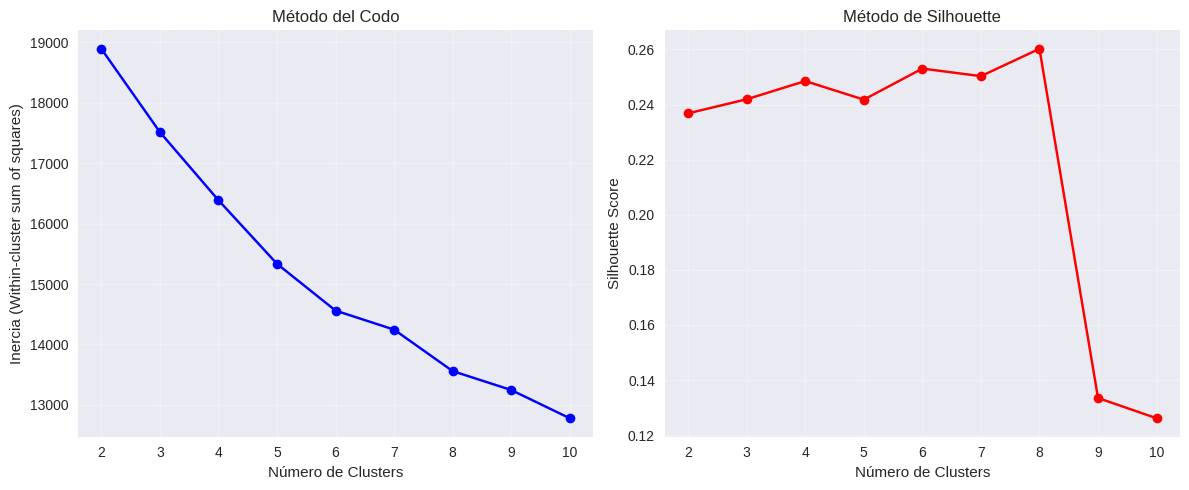


Número óptimo de clusters (según Silhouette): 8
  Silhouette Score: 0.2602

Número sugerido (método del codo): 6

Análisis de número óptimo completado


In [9]:
# Determinación del número óptimo de clusters
if problem_type == 'clustering' and X_clustering is not None:
    print("=" * 60)
    print("DETERMINACIÓN DEL NÚMERO ÓPTIMO DE CLUSTERS")
    print("=" * 60)

    # Probar diferentes números de clusters
    range_n_clusters = range(2, 11)
    inertias = []
    silhouette_scores = []
    davies_bouldin_scores = []
    calinski_harabasz_scores = []

    print("\nEvaluando diferentes números de clusters...")
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = kmeans.fit_predict(X_clustering)

        inertias.append(kmeans.inertia_)
        silhouette_avg = silhouette_score(X_clustering, cluster_labels)
        silhouette_scores.append(silhouette_avg)
        davies_bouldin_scores.append(davies_bouldin_score(X_clustering, cluster_labels))
        calinski_harabasz_scores.append(calinski_harabasz_score(X_clustering, cluster_labels))

        print(f"  {n_clusters} clusters: Silhouette={silhouette_avg:.3f}, Inertia={kmeans.inertia_:.2f}")

    # Visualización del método del codo
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertias, 'bo-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia (Within-cluster sum of squares)')
    plt.title('Método del Codo')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, 'ro-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Método de Silhouette')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Encontrar número óptimo (mayor silhouette score)
    optimal_k = range_n_clusters[np.argmax(silhouette_scores)]
    print(f"\nNúmero óptimo de clusters (según Silhouette): {optimal_k}")
    print(f"  Silhouette Score: {max(silhouette_scores):.4f}")

    optimal_k_elbow = range_n_clusters[np.argmin([abs(inertias[i] - inertias[i+1]) / inertias[i]
                                                   for i in range(len(inertias)-1)])]
    print(f"\nNúmero sugerido (método del codo): {optimal_k_elbow}")

    results_optimal_k = {
        'optimal_k_silhouette': optimal_k,
        'optimal_k_elbow': optimal_k_elbow,
        'silhouette_scores': silhouette_scores,
        'inertias': inertias,
        'davies_bouldin_scores': davies_bouldin_scores,
        'calinski_harabasz_scores': calinski_harabasz_scores
    }

    print("\nAnálisis de número óptimo completado")
else:
    print("No se puede determinar número óptimo sin datos preparados.")
    results_optimal_k = None


### 7.2. Modelo 1: K-Means Clustering


MODELO 1: K-MEANS CLUSTERING

Usando número óptimo de clusters: 8

Métricas de Rendimiento:
  Silhouette Score:     0.2602 (mayor es mejor, rango: -1 a 1)
  Davies-Bouldin Index: 1.3253 (menor es mejor)
  Calinski-Harabasz:    41.87 (mayor es mejor)
  Inercia:              13559.06 (menor es mejor)

Distribución de pacientes por cluster:
  Cluster 0: 53 pacientes (10.2%)
  Cluster 1: 308 pacientes (59.2%)
  Cluster 2: 72 pacientes (13.8%)
  Cluster 3: 16 pacientes (3.1%)
  Cluster 4: 28 pacientes (5.4%)
  Cluster 5: 35 pacientes (6.7%)
  Cluster 6: 1 pacientes (0.2%)
  Cluster 7: 7 pacientes (1.3%)


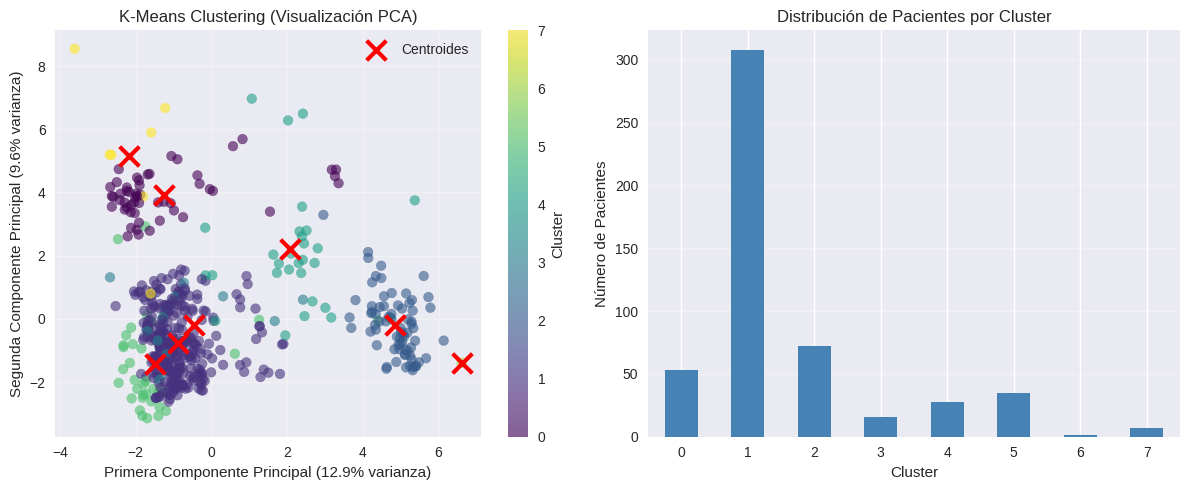


Modelo K-Means entrenado y evaluado


In [10]:
# Modelo 1: K-Means Clustering
if problem_type == 'clustering' and X_clustering is not None:
    print("=" * 60)
    print("MODELO 1: K-MEANS CLUSTERING")
    print("=" * 60)

    # Usar número óptimo determinado anteriormente, o un valor por defecto
    if 'results_optimal_k' in locals() and results_optimal_k:
        n_clusters = results_optimal_k['optimal_k_silhouette']
        print(f"\nUsando número óptimo de clusters: {n_clusters}")
    else:
        n_clusters = 4  # Valor por defecto
        print(f"\nUsando número de clusters por defecto: {n_clusters}")

    # Entrenar modelo K-Means
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    cluster_labels_kmeans = kmeans_model.fit_predict(X_clustering)

    # Métricas de evaluación
    silhouette_kmeans = silhouette_score(X_clustering, cluster_labels_kmeans)
    davies_bouldin_kmeans = davies_bouldin_score(X_clustering, cluster_labels_kmeans)
    calinski_harabasz_kmeans = calinski_harabasz_score(X_clustering, cluster_labels_kmeans)

    print(f"\nMétricas de Rendimiento:")
    print(f"  Silhouette Score:     {silhouette_kmeans:.4f} (mayor es mejor, rango: -1 a 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin_kmeans:.4f} (menor es mejor)")
    print(f"  Calinski-Harabasz:    {calinski_harabasz_kmeans:.2f} (mayor es mejor)")
    print(f"  Inercia:              {kmeans_model.inertia_:.2f} (menor es mejor)")

    # Distribución de clusters
    cluster_counts = pd.Series(cluster_labels_kmeans).value_counts().sort_index()
    print(f"\nDistribución de pacientes por cluster:")
    for cluster_id, count in cluster_counts.items():
        pct = (count / len(cluster_labels_kmeans)) * 100
        print(f"  Cluster {cluster_id}: {count} pacientes ({pct:.1f}%)")

    # Visualización con PCA (reducción a 2D para visualización)
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_clustering)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_kmeans, cmap='viridis', alpha=0.6)
    plt.scatter(kmeans_model.cluster_centers_[:, 0] if X_clustering.shape[1] == 2
                else pca.transform(kmeans_model.cluster_centers_)[:, 0],
                kmeans_model.cluster_centers_[:, 1] if X_clustering.shape[1] == 2
                else pca.transform(kmeans_model.cluster_centers_)[:, 1],
                marker='x', s=200, c='red', linewidths=3, label='Centroides')
    plt.xlabel(f'Primera Componente Principal ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
    plt.ylabel(f'Segunda Componente Principal ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
    plt.title('K-Means Clustering (Visualización PCA)')
    plt.colorbar(scatter, label='Cluster')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    cluster_counts.plot(kind='bar', color='steelblue')
    plt.xlabel('Cluster')
    plt.ylabel('Número de Pacientes')
    plt.title('Distribución de Pacientes por Cluster')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    kmeans_results = {
        'model': 'K-Means',
        'n_clusters': n_clusters,
        'silhouette': silhouette_kmeans,
        'davies_bouldin': davies_bouldin_kmeans,
        'calinski_harabasz': calinski_harabasz_kmeans,
        'inertia': kmeans_model.inertia_,
        'cluster_labels': cluster_labels_kmeans,
        'cluster_centers': kmeans_model.cluster_centers_
    }

    print("\nModelo K-Means entrenado y evaluado")
else:
    print("No se puede entrenar K-Means sin datos preparados.")
    kmeans_results = None


### 7.3. Modelo 2: DBSCAN Clustering


MODELO 2: DBSCAN CLUSTERING

Parámetros DBSCAN:
  eps estimado: 7.088
  min_samples: 5

Resultados DBSCAN:
  Número de clusters: 2
  Puntos de ruido (outliers): 33 (6.3%)

Métricas de Rendimiento (sin ruido):
  Silhouette Score:     0.4107
  Davies-Bouldin Index: 0.8177
  Calinski-Harabasz:    14.99

Distribución de pacientes por cluster:
  Ruido (outliers): 33 pacientes (6.3%)
  Cluster 0: 483 pacientes (92.9%)
  Cluster 1: 4 pacientes (0.8%)


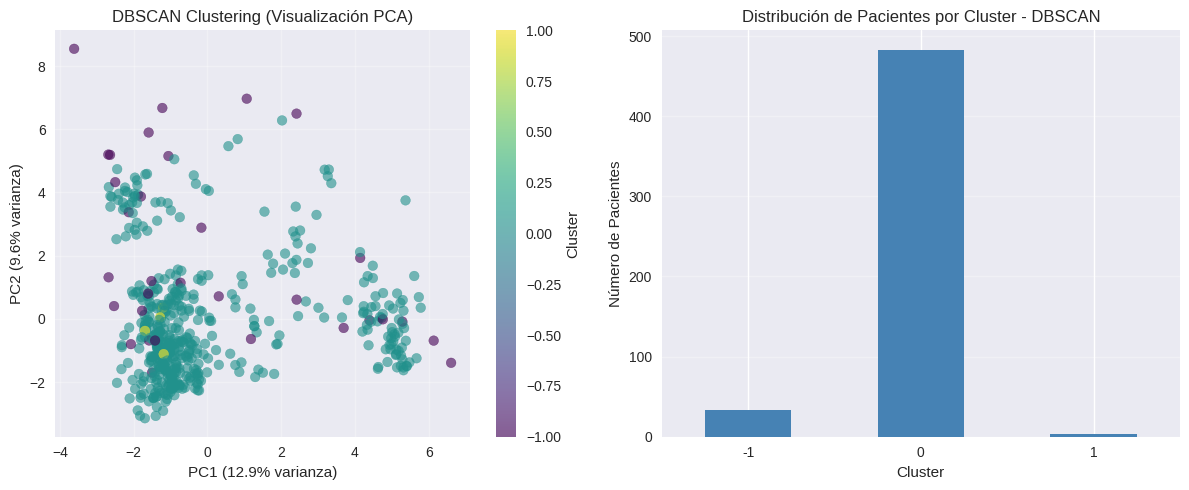


Modelo DBSCAN entrenado y evaluado


In [11]:
# Modelo 2: DBSCAN Clustering
if problem_type == 'clustering' and X_clustering is not None:
    print("=" * 60)
    print("MODELO 2: DBSCAN CLUSTERING")
    print("=" * 60)

    # DBSCAN no requiere número de clusters a priori
    # Parámetros: eps (distancia máxima) y min_samples (mínimo de puntos)
    # Usar PCA para estimar eps
    from sklearn.neighbors import NearestNeighbors

    # Calcular distancias a k-vecinos más cercanos para estimar eps
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(X_clustering)
    distances, indices = neighbors_fit.kneighbors(X_clustering)
    distances = np.sort(distances, axis=0)
    distances = distances[:, 4]  # Distancia al 5to vecino

    # Estimar eps como percentil 90 de las distancias
    eps_estimate = np.percentile(distances, 90)
    min_samples = 5

    print(f"\nParámetros DBSCAN:")
    print(f"  eps estimado: {eps_estimate:.3f}")
    print(f"  min_samples: {min_samples}")

    # Entrenar DBSCAN
    dbscan_model = DBSCAN(eps=eps_estimate, min_samples=min_samples)
    cluster_labels_dbscan = dbscan_model.fit_predict(X_clustering)

    # Identificar número de clusters (excluyendo ruido -1)
    n_clusters_dbscan = len(set(cluster_labels_dbscan)) - (1 if -1 in cluster_labels_dbscan else 0)
    n_noise = list(cluster_labels_dbscan).count(-1)

    print(f"\nResultados DBSCAN:")
    print(f"  Número de clusters: {n_clusters_dbscan}")
    print(f"  Puntos de ruido (outliers): {n_noise} ({n_noise/len(cluster_labels_dbscan)*100:.1f}%)")

    # Métricas (solo si hay al menos 2 clusters)
    if n_clusters_dbscan >= 2:
        # Filtrar ruido para métricas
        mask = cluster_labels_dbscan != -1
        if mask.sum() > 0:
            silhouette_dbscan = silhouette_score(X_clustering[mask], cluster_labels_dbscan[mask])
            davies_bouldin_dbscan = davies_bouldin_score(X_clustering[mask], cluster_labels_dbscan[mask])
            calinski_harabasz_dbscan = calinski_harabasz_score(X_clustering[mask], cluster_labels_dbscan[mask])

            print(f"\nMétricas de Rendimiento (sin ruido):")
            print(f"  Silhouette Score:     {silhouette_dbscan:.4f}")
            print(f"  Davies-Bouldin Index: {davies_bouldin_dbscan:.4f}")
            print(f"  Calinski-Harabasz:    {calinski_harabasz_dbscan:.2f}")
        else:
            silhouette_dbscan = None
            davies_bouldin_dbscan = None
            calinski_harabasz_dbscan = None
    else:
        print("\nADVERTENCIA: DBSCAN encontró menos de 2 clusters. Ajustar parámetros.")
        silhouette_dbscan = None
        davies_bouldin_dbscan = None
        calinski_harabasz_dbscan = None

    # Distribución de clusters
    cluster_counts_dbscan = pd.Series(cluster_labels_dbscan).value_counts().sort_index()
    print(f"\nDistribución de pacientes por cluster:")
    for cluster_id, count in cluster_counts_dbscan.items():
        if cluster_id == -1:
            print(f"  Ruido (outliers): {count} pacientes ({count/len(cluster_labels_dbscan)*100:.1f}%)")
        else:
            print(f"  Cluster {cluster_id}: {count} pacientes ({count/len(cluster_labels_dbscan)*100:.1f}%)")

    # Visualización con PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_clustering)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_dbscan, cmap='viridis', alpha=0.6)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
    plt.title('DBSCAN Clustering (Visualización PCA)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    cluster_counts_dbscan.plot(kind='bar', color='steelblue')
    plt.xlabel('Cluster')
    plt.ylabel('Número de Pacientes')
    plt.title('Distribución de Pacientes por Cluster - DBSCAN')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    dbscan_results = {
        'model': 'DBSCAN',
        'n_clusters': n_clusters_dbscan,
        'n_noise': n_noise,
        'silhouette': silhouette_dbscan,
        'davies_bouldin': davies_bouldin_dbscan,
        'calinski_harabasz': calinski_harabasz_dbscan,
        'cluster_labels': cluster_labels_dbscan
    }

    print("\nModelo DBSCAN entrenado y evaluado")
else:
    print("No se puede entrenar DBSCAN sin datos preparados.")
    dbscan_results = None


### 7.4. Modelo 3: Gradient Boosting


MODELO 3: AGGLOMERATIVE CLUSTERING (JERÁRQUICO)

Usando número óptimo de clusters: 8

Métricas de Rendimiento:
  Silhouette Score:     0.2397 (mayor es mejor, rango: -1 a 1)
  Davies-Bouldin Index: 1.3016 (menor es mejor)
  Calinski-Harabasz:    38.81 (mayor es mejor)

Distribución de pacientes por cluster:
  Cluster 0: 318 pacientes (61.2%)
  Cluster 1: 67 pacientes (12.9%)
  Cluster 2: 63 pacientes (12.1%)
  Cluster 3: 24 pacientes (4.6%)
  Cluster 4: 29 pacientes (5.6%)
  Cluster 5: 13 pacientes (2.5%)
  Cluster 6: 1 pacientes (0.2%)
  Cluster 7: 5 pacientes (1.0%)


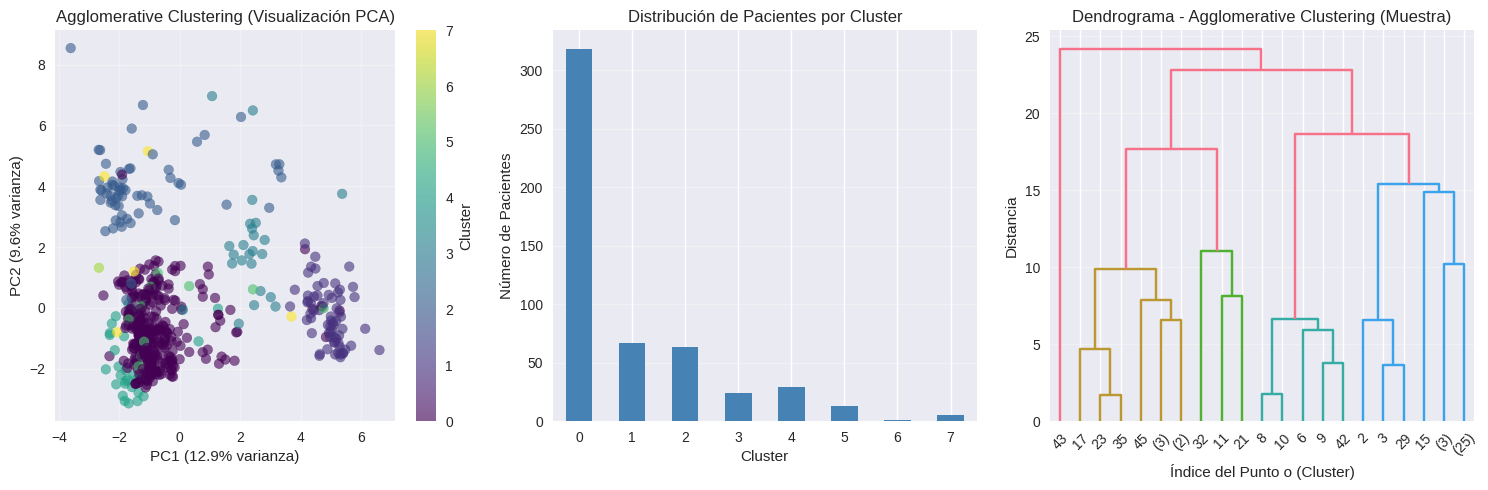


Modelo Agglomerative Clustering entrenado y evaluado


In [12]:
# Modelo 3: Agglomerative Clustering (Jerárquico)
if problem_type == 'clustering' and X_clustering is not None:
    print("=" * 60)
    print("MODELO 3: AGGLOMERATIVE CLUSTERING (JERÁRQUICO)")
    print("=" * 60)

    # Usar número óptimo determinado anteriormente
    if 'results_optimal_k' in locals() and results_optimal_k:
        n_clusters_agg = results_optimal_k['optimal_k_silhouette']
        print(f"\nUsando número óptimo de clusters: {n_clusters_agg}")
    else:
        n_clusters_agg = 4  # Valor por defecto
        print(f"\nUsando número de clusters por defecto: {n_clusters_agg}")

    # Entrenar Agglomerative Clustering
    # linkage='ward' funciona bien con datos estandarizados
    agg_model = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
    cluster_labels_agg = agg_model.fit_predict(X_clustering)

    # Métricas de evaluación
    silhouette_agg = silhouette_score(X_clustering, cluster_labels_agg)
    davies_bouldin_agg = davies_bouldin_score(X_clustering, cluster_labels_agg)
    calinski_harabasz_agg = calinski_harabasz_score(X_clustering, cluster_labels_agg)

    print(f"\nMétricas de Rendimiento:")
    print(f"  Silhouette Score:     {silhouette_agg:.4f} (mayor es mejor, rango: -1 a 1)")
    print(f"  Davies-Bouldin Index: {davies_bouldin_agg:.4f} (menor es mejor)")
    print(f"  Calinski-Harabasz:    {calinski_harabasz_agg:.2f} (mayor es mejor)")

    # Distribución de clusters
    cluster_counts_agg = pd.Series(cluster_labels_agg).value_counts().sort_index()
    print(f"\nDistribución de pacientes por cluster:")
    for cluster_id, count in cluster_counts_agg.items():
        pct = (count / len(cluster_labels_agg)) * 100
        print(f"  Cluster {cluster_id}: {count} pacientes ({pct:.1f}%)")

    # Visualización con PCA
    pca = PCA(n_components=2, random_state=42)
    X_pca = pca.fit_transform(X_clustering)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels_agg, cmap='viridis', alpha=0.6)
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% varianza)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% varianza)')
    plt.title('Agglomerative Clustering (Visualización PCA)')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    cluster_counts_agg.plot(kind='bar', color='steelblue')
    plt.xlabel('Cluster')
    plt.ylabel('Número de Pacientes')
    plt.title('Distribución de Pacientes por Cluster')
    plt.xticks(rotation=0)
    plt.grid(True, alpha=0.3, axis='y')

    # Dendrograma (usar muestra más pequeña para visualización)
    plt.subplot(1, 3, 3)
    # Usar muestra de 50 puntos para el dendrograma (demasiados puntos hace lento)
    sample_size = min(50, len(X_clustering))
    sample_indices = np.random.choice(len(X_clustering), sample_size, replace=False)
    X_sample = X_clustering.iloc[sample_indices]

    linkage_matrix = linkage(X_sample, method='ward')
    dendrogram(linkage_matrix, truncate_mode='level', p=5)
    plt.xlabel('Índice del Punto o (Cluster)')
    plt.ylabel('Distancia')
    plt.title('Dendrograma - Agglomerative Clustering (Muestra)')
    plt.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

    agg_results = {
        'model': 'Agglomerative Clustering',
        'n_clusters': n_clusters_agg,
        'silhouette': silhouette_agg,
        'davies_bouldin': davies_bouldin_agg,
        'calinski_harabasz': calinski_harabasz_agg,
        'cluster_labels': cluster_labels_agg
    }

    print("\nModelo Agglomerative Clustering entrenado y evaluado")
else:
    print("No se puede entrenar Agglomerative Clustering sin datos preparados.")
    agg_results = None


### 7.5. Comparación de Modelos


COMPARACIÓN DE MODELOS DE CLUSTERING

Tabla Comparativa de Modelos de Clustering:
       Modelo  N_Clusters  Silhouette  Davies-Bouldin  Calinski-Harabasz
      K-Means           8    0.260221        1.325288          41.865552
       DBSCAN           2    0.410709        0.817651          14.990050
Agglomerative           8    0.239679        1.301621          38.811368


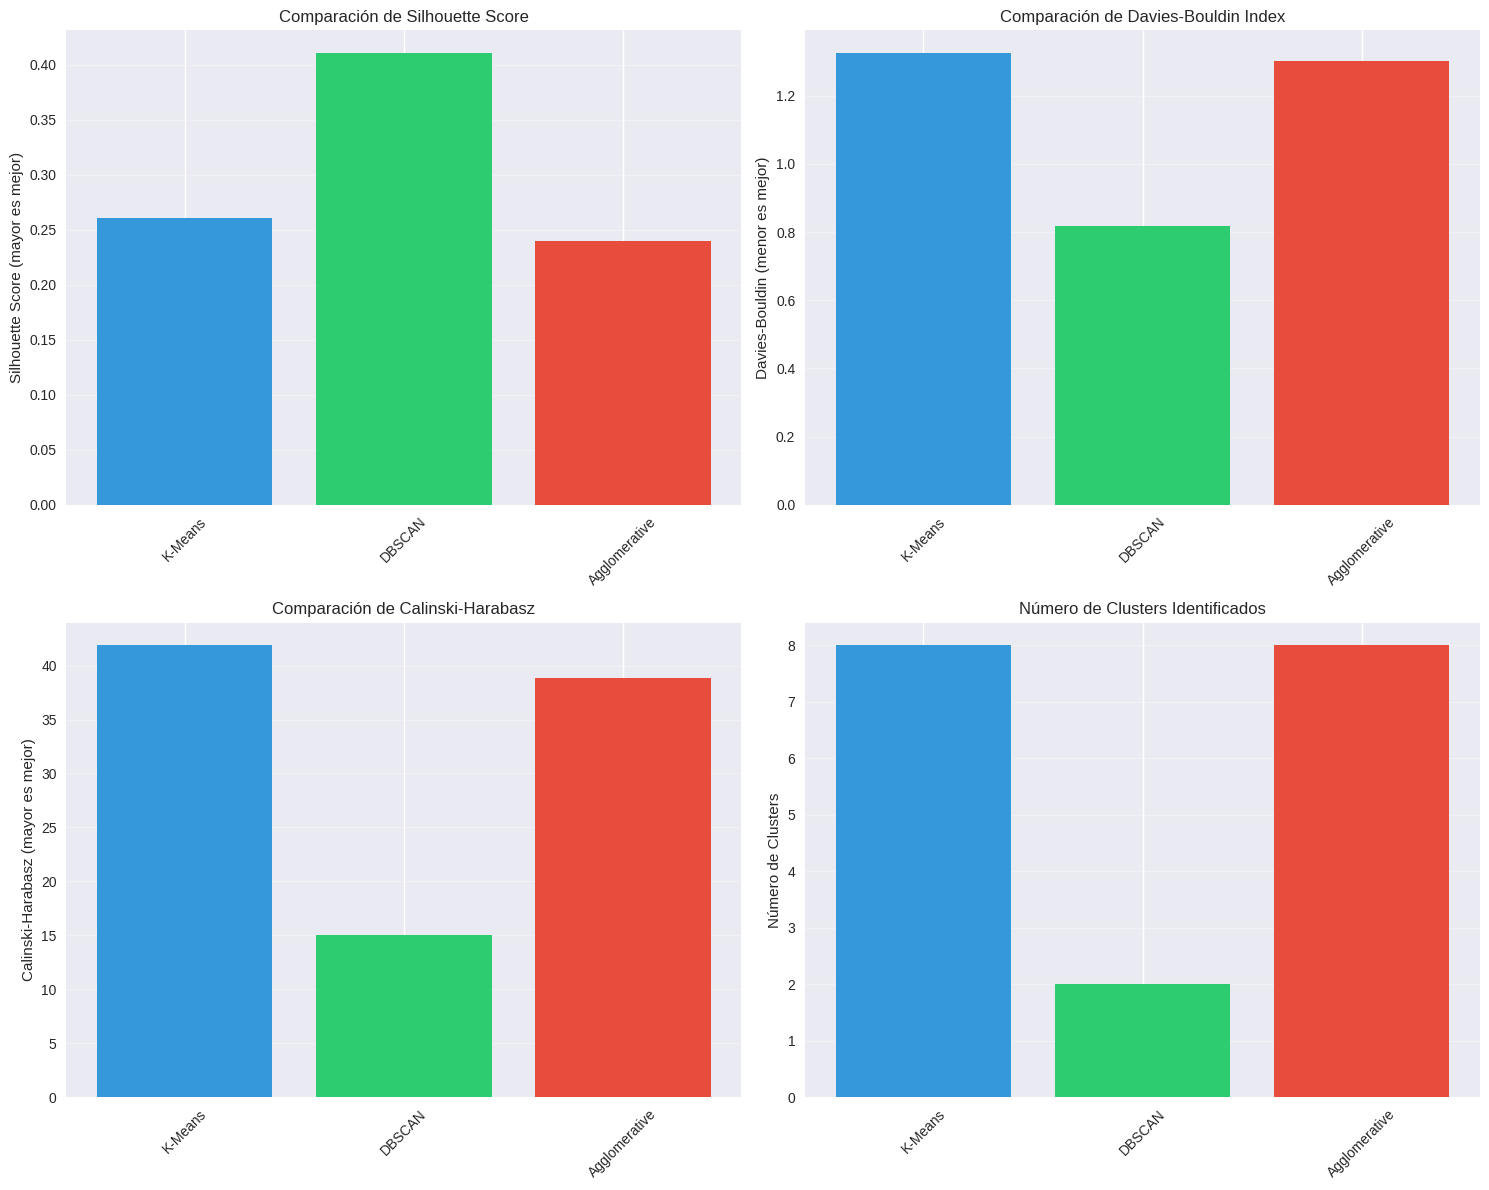


Mejor modelo (por Silhouette Score): DBSCAN (0.4107)

Comparación de modelos completada


In [13]:
# Comparación de todos los modelos de clustering
if problem_type == 'clustering':
    print("=" * 60)
    print("COMPARACIÓN DE MODELOS DE CLUSTERING")
    print("=" * 60)

    # Recopilar resultados
    results_list = []

    if kmeans_results:
        results_list.append({
            'Modelo': 'K-Means',
            'N_Clusters': kmeans_results['n_clusters'],
            'Silhouette': kmeans_results['silhouette'],
            'Davies-Bouldin': kmeans_results['davies_bouldin'],
            'Calinski-Harabasz': kmeans_results['calinski_harabasz']
        })

    if dbscan_results:
        results_list.append({
            'Modelo': 'DBSCAN',
            'N_Clusters': dbscan_results['n_clusters'],
            'Silhouette': dbscan_results['silhouette'],
            'Davies-Bouldin': dbscan_results['davies_bouldin'],
            'Calinski-Harabasz': dbscan_results['calinski_harabasz']
        })

    if agg_results:
        results_list.append({
            'Modelo': 'Agglomerative',
            'N_Clusters': agg_results['n_clusters'],
            'Silhouette': agg_results['silhouette'],
            'Davies-Bouldin': agg_results['davies_bouldin'],
            'Calinski-Harabasz': agg_results['calinski_harabasz']
        })

    if results_list:
        comparison_df = pd.DataFrame(results_list)
        print("\nTabla Comparativa de Modelos de Clustering:")
        print(comparison_df.to_string(index=False))

        # Visualización comparativa
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))

        # Silhouette Score
        models = comparison_df['Modelo'].tolist()
        silhouettes = comparison_df['Silhouette'].dropna().tolist()
        silhouette_models = comparison_df[comparison_df['Silhouette'].notna()]['Modelo'].tolist()
        if silhouettes:
            axes[0, 0].bar(silhouette_models, silhouettes, color=['#3498db', '#2ecc71', '#e74c3c'])
            axes[0, 0].set_title('Comparación de Silhouette Score')
            axes[0, 0].set_ylabel('Silhouette Score (mayor es mejor)')
            axes[0, 0].tick_params(axis='x', rotation=45)
            axes[0, 0].grid(True, alpha=0.3, axis='y')

        # Davies-Bouldin Index
        db_scores = comparison_df['Davies-Bouldin'].dropna().tolist()
        db_models = comparison_df[comparison_df['Davies-Bouldin'].notna()]['Modelo'].tolist()
        if db_scores:
            axes[0, 1].bar(db_models, db_scores, color=['#3498db', '#2ecc71', '#e74c3c'])
            axes[0, 1].set_title('Comparación de Davies-Bouldin Index')
            axes[0, 1].set_ylabel('Davies-Bouldin (menor es mejor)')
            axes[0, 1].tick_params(axis='x', rotation=45)
            axes[0, 1].grid(True, alpha=0.3, axis='y')

        # Calinski-Harabasz
        ch_scores = comparison_df['Calinski-Harabasz'].dropna().tolist()
        ch_models = comparison_df[comparison_df['Calinski-Harabasz'].notna()]['Modelo'].tolist()
        if ch_scores:
            axes[1, 0].bar(ch_models, ch_scores, color=['#3498db', '#2ecc71', '#e74c3c'])
            axes[1, 0].set_title('Comparación de Calinski-Harabasz')
            axes[1, 0].set_ylabel('Calinski-Harabasz (mayor es mejor)')
            axes[1, 0].tick_params(axis='x', rotation=45)
            axes[1, 0].grid(True, alpha=0.3, axis='y')

        # Número de Clusters
        n_clusters_list = comparison_df['N_Clusters'].tolist()
        if n_clusters_list:
            axes[1, 1].bar(models, n_clusters_list, color=['#3498db', '#2ecc71', '#e74c3c'])
            axes[1, 1].set_title('Número de Clusters Identificados')
            axes[1, 1].set_ylabel('Número de Clusters')
            axes[1, 1].tick_params(axis='x', rotation=45)
            axes[1, 1].grid(True, alpha=0.3, axis='y')

        plt.tight_layout()
        plt.show()

        # Identificar mejor modelo (por Silhouette Score)
        if len(comparison_df[comparison_df['Silhouette'].notna()]) > 0:
            best_idx = comparison_df[comparison_df['Silhouette'].notna()]['Silhouette'].idxmax()
            best_model = comparison_df.loc[best_idx, 'Modelo']
            best_silhouette = comparison_df.loc[best_idx, 'Silhouette']
            print(f"\nMejor modelo (por Silhouette Score): {best_model} ({best_silhouette:.4f})")

        print("\nComparación de modelos completada")
else:
    print("No se pueden comparar modelos sin resultados disponibles.")


## 8. Conclusiones y Próximos Pasos

### 8.1. Resumen de Resultados


**Resumen de la Segunda Entrega:**

1. **Análisis Exploratorio de Datos (EDA):**
   - Se realizó un análisis exhaustivo de la calidad de los datos
   - Se identificaron valores faltantes, outliers y distribuciones
   - Se analizaron correlaciones entre variables
   - Se identificó y caracterizó la variable objetivo

2. **Justificación de Selección de Datos y Variables:**
   - Se establecieron criterios claros para la selección de variables
   - Se excluyeron variables con >50% de valores faltantes
   - Se mantuvieron variables con variabilidad suficiente
   - Se justificó la selección basada en criterios de calidad

3. **Planteamiento de Hipótesis:**
   - Se formularon hipótesis principales y secundarias
   - Se definió una estrategia de validación
   - Se establecieron métricas de evaluación

4. **Modelos de Referencia y Experimentos:**
   - Se implementaron 3 modelos de referencia (Regresión Logística, Random Forest, Gradient Boosting)
   - Se compararon con un baseline (clasificador de mayoría)
   - Se evaluaron con múltiples métricas (Accuracy, Precision, Recall, F1, ROC-AUC)
   - Se realizó validación cruzada para robustecer los resultados


### 8.2. Validación de Hipótesis

**Resultados de la validación:**

- **H1 (Hipótesis Principal)**: [Pendiente de evaluación después de ejecutar los modelos]
  - Si los modelos superan el baseline, H1 se acepta
  - Si no superan, H1 se rechaza

- **H2**: Variables numéricas vs categóricas
  - Se evaluará mediante análisis de importancia de características

- **H3**: Modelos no lineales vs lineales
  - Se comparará Random Forest y Gradient Boosting vs Regresión Logística

- **H4**: Impacto de valores faltantes
  - Se manejaron mediante imputación, se evaluará el impacto en futuras iteraciones

- **H5**: Desbalance de clases
  - Se detectó en el análisis inicial, se evaluará si afecta el rendimiento


### 8.3. Próximos Pasos

**Para la siguiente etapa se recomienda:**

1. **Optimización de Hiperparámetros:**
   - Realizar búsqueda de grid o random search para optimizar parámetros
   - Aplicar técnicas de validación cruzada más robustas

2. **Feature Engineering:**
   - Crear nuevas características derivadas
   - Aplicar transformaciones no lineales
   - Considerar técnicas de selección de características

3. **Manejo de Desbalance (si aplica):**
   - Aplicar técnicas de balanceo (SMOTE, undersampling, oversampling)
   - Ajustar pesos de clases en los modelos
   - Evaluar métricas apropiadas para clases desbalanceadas

4. **Modelos Avanzados:**
   - Probar modelos más complejos (XGBoost, LightGBM, Neural Networks)
   - Ensamblar múltiples modelos
   - Aplicar técnicas de stacking o voting

5. **Análisis de Errores:**
   - Analizar casos mal clasificados
   - Identificar patrones en los errores
   - Mejorar el modelo basado en insights

6. **Validación Final:**
   - Evaluar en conjunto de test independiente
   - Realizar análisis de robustez
   - Documentar limitaciones y supuestos del modelo


In [14]:
# Estadísticas descriptivas para variables numéricas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())
else:
    print("No se encontraron variables numéricas.")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
           row_id  ano_inf  mun_codigo   codigo_dane  dane_anterior  \
count  520.000000    520.0       520.0  5.200000e+02   5.200000e+02   
mean   260.500000   2025.0         1.0  2.129241e+11   2.142703e+11   
std    150.255338      0.0         0.0  7.463561e+10   7.537243e+10   
min      1.000000   2025.0         1.0  1.760010e+11   1.760010e+11   
25%    130.750000   2025.0         1.0  1.760010e+11   1.760010e+11   
50%    260.500000   2025.0         1.0  1.760010e+11   1.760010e+11   
75%    390.250000   2025.0         1.0  1.760018e+11   1.760018e+11   
max    520.000000   2025.0         1.0  4.760010e+11   4.760010e+11   

          cons_sede  tipo_documento  nro_documento   exp_depto     exp_mun  \
count  5.200000e+02      520.000000   5.110000e+02  520.000000  520.000000   
mean   2.129241e+13        3.528846   1.060953e+09   68.311538   24.005769   
std    7.463561e+12        2.928686   5.257578e+08   20.664842  111.064763   


In [15]:
# Estadísticas descriptivas para variables categóricas
print("=" * 60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    for col in categorical_cols[:10]:  # Mostrar primeras 10
        print(f"\n{col}:")
        print(df[col].value_counts().head(10))
        print(f"Valores únicos: {df[col].nunique()}")
else:
    print("No se encontraron variables categóricas.")


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS

nombre_institucion:
nombre_institucion
INSTITUCION EDUCATIVA LLANO VERDE                                24
ASODISVALLE                                                      24
INSTITUCION EDUCATIVA TECNICO INDUSTRIAL ANTONIO JOSE CAMACHO    15
INSTITUCION EDUCATIVA TECNICO INDUSTRIAL JOSE MARIA CARBONELL    15
INSTITUCION EDUCATIVA NORMAL SUPERIOR LOS FARALLONES             14
INSTITUCION EDUCATIVA ALVARO ECHEVERRY PEREA                     14
INSTITUCION EDUCATIVA TECNICO DE COMERCIO SANTA CECILIA          13
INSTITUCION EDUCATIVA INEM JORGE ISAACS                          12
CENTRO EDUCATIVO IDEAL                                           11
INSTITUCION EDUCATIVA TECNICA DE COMERCIO SIMON RODRIGUEZ        10
Name: count, dtype: int64
Valores únicos: 110

comuna:
comuna
Comuna 08    51
Comuna 04    43
Comuna 10    40
Comuna 13    40
Comuna 15    37
Comuna 14    27
Comuna 18    26
Comuna 03    24
Comuna 07    24
Comuna 19    24
Name: co

### 3.4. Visualizaciones Exploratorias


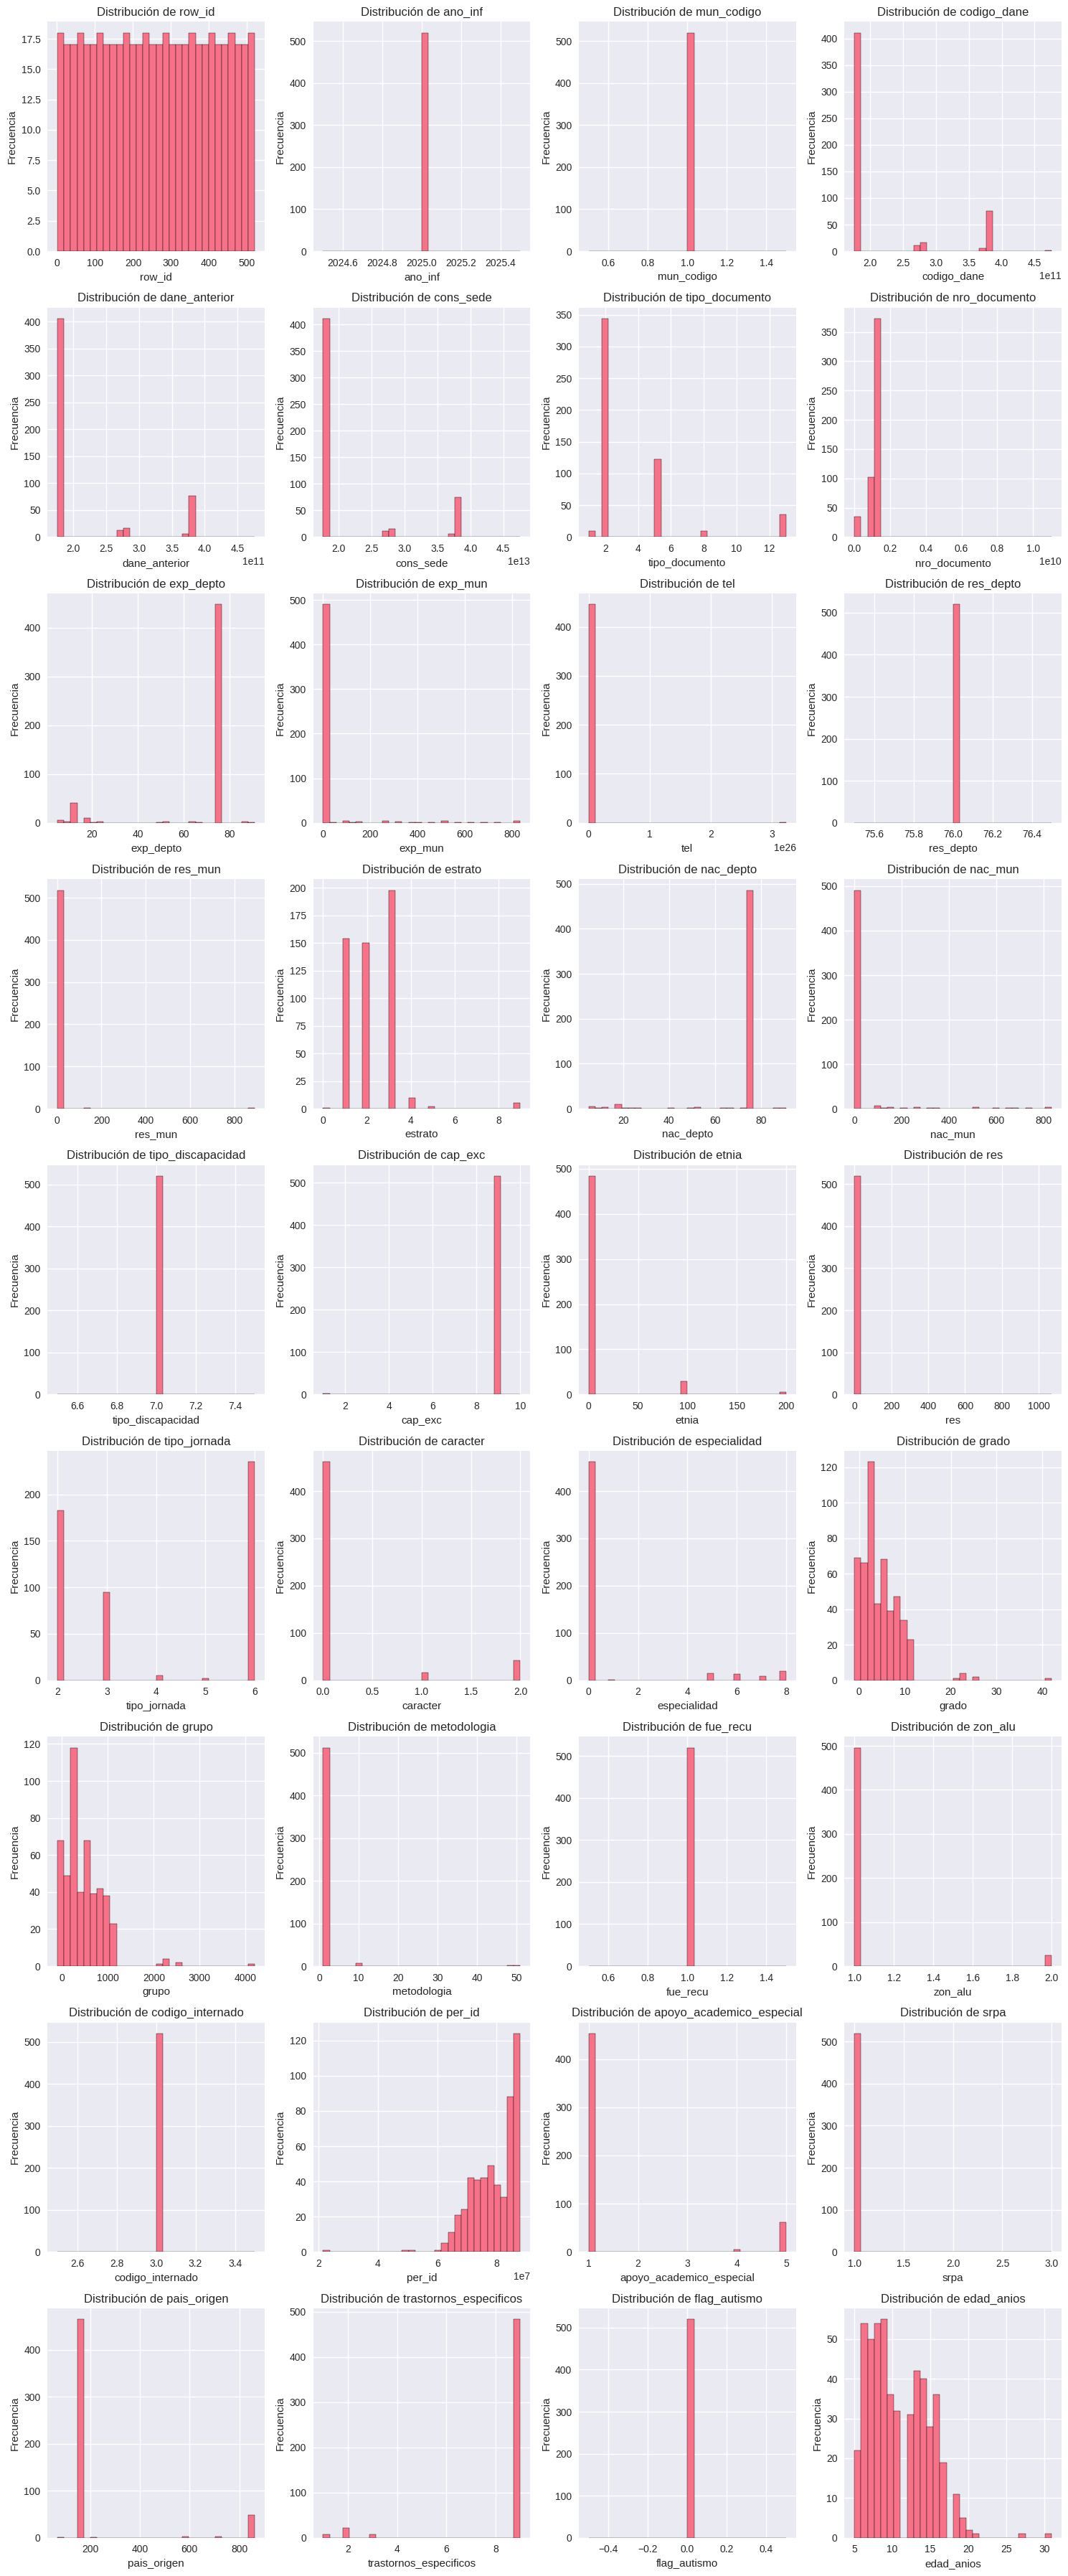

In [16]:
# Distribución de variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(numeric_cols[:n_rows*n_cols]):
        df[col].hist(bins=30, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribución de {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


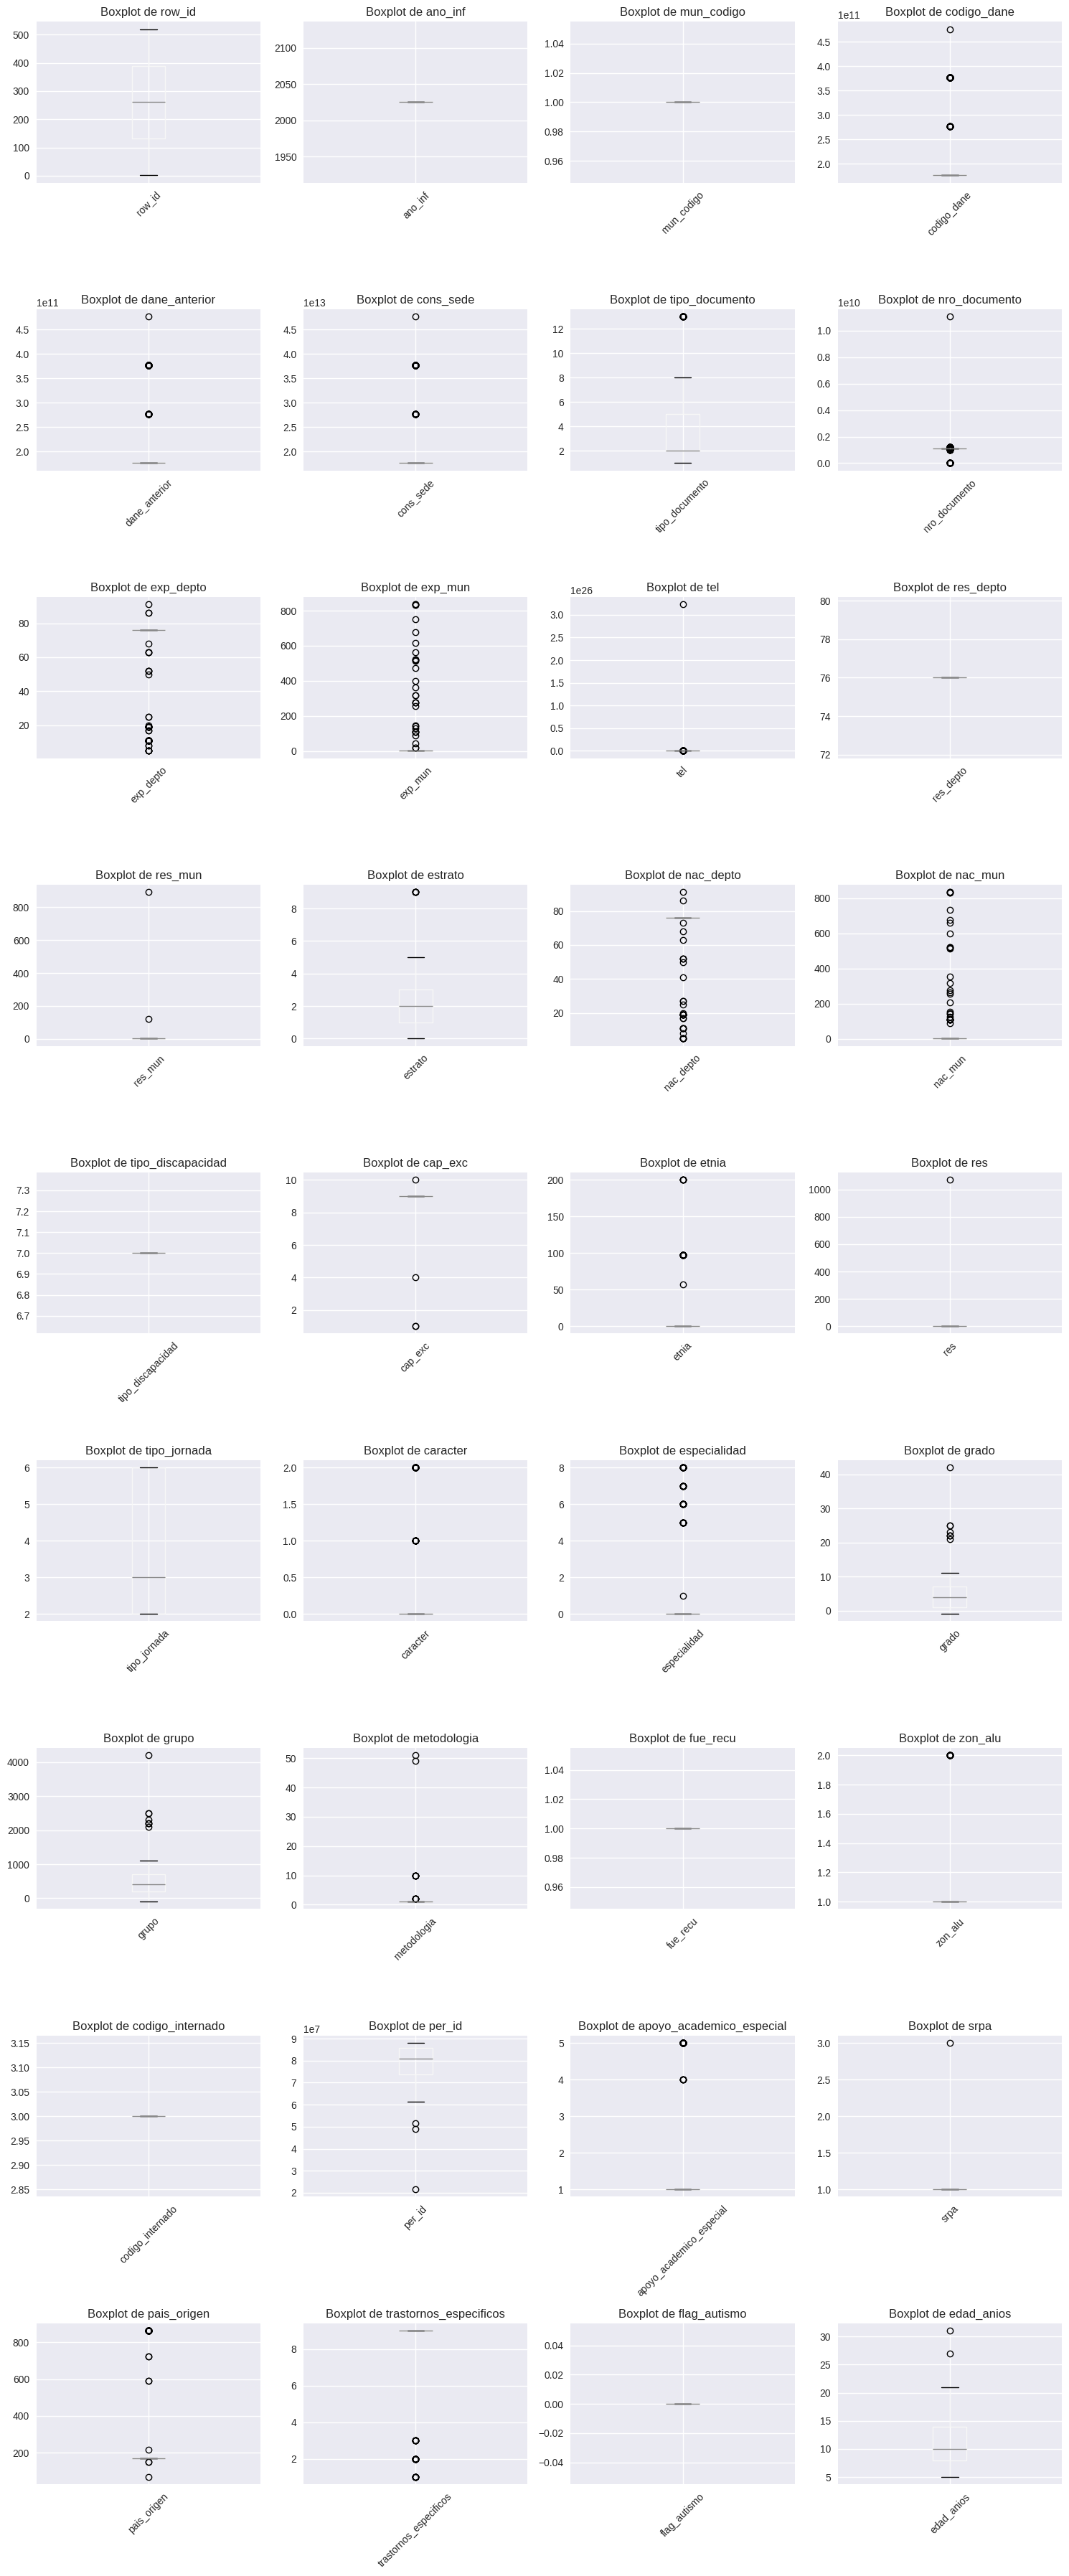

In [17]:
# Boxplots para detectar outliers
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    n_cols = min(4, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_cols == 1 else axes

    for idx, col in enumerate(numeric_cols[:n_rows*n_cols]):
        df.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'Boxplot de {col}')
        axes[idx].tick_params(axis='x', rotation=45)

    for idx in range(len(numeric_cols), len(axes)):
        axes[idx].axis('off')

    plt.tight_layout()
    plt.show()


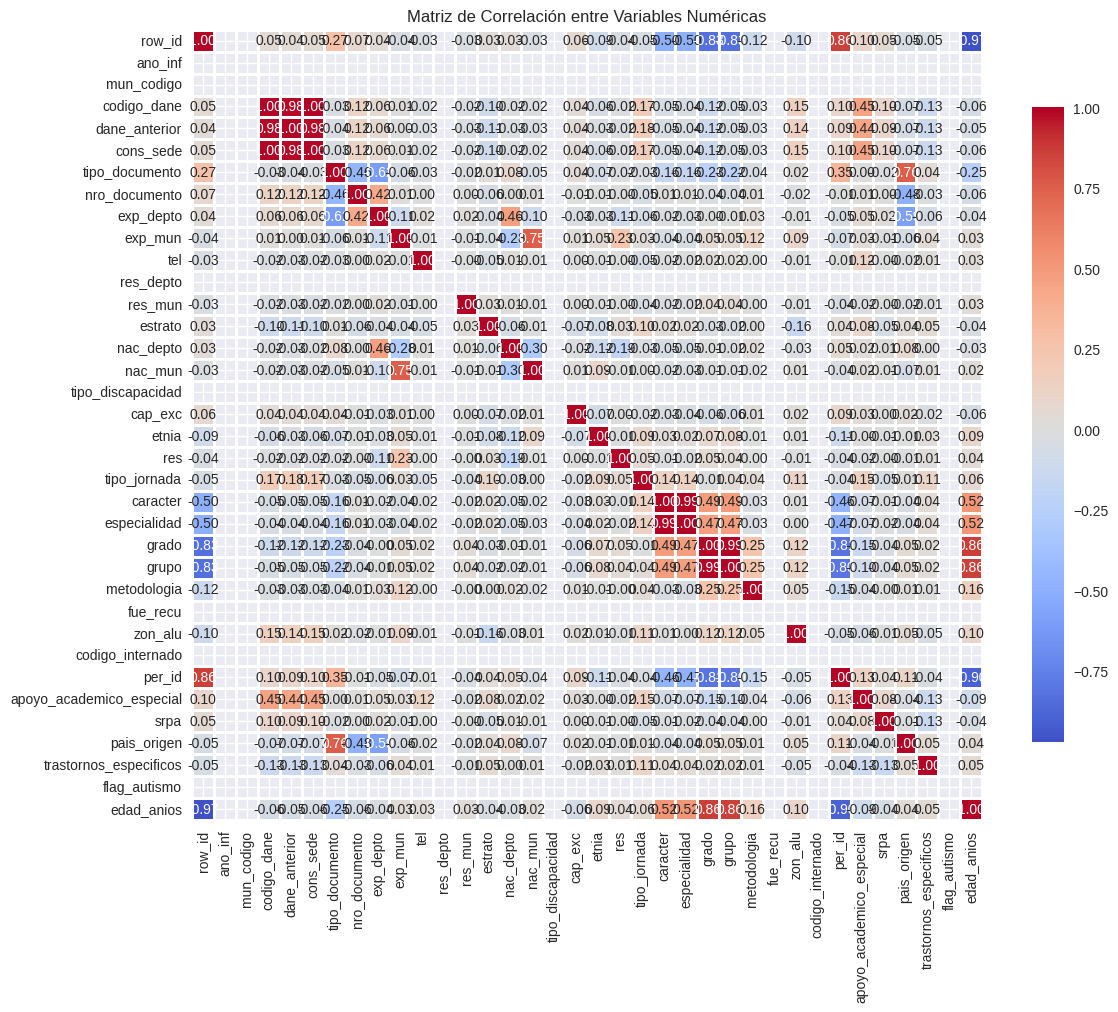


Correlaciones fuertes (|r| > 0.7):
  row_id - grado: -0.827
  row_id - grupo: -0.825
  row_id - per_id: 0.858
  row_id - edad_anios: -0.971
  codigo_dane - dane_anterior: 0.981
  codigo_dane - cons_sede: 1.000
  dane_anterior - cons_sede: 0.981
  tipo_documento - pais_origen: 0.759
  exp_mun - nac_mun: 0.746
  caracter - especialidad: 0.985
  grado - grupo: 0.994
  grado - per_id: -0.812
  grado - edad_anios: 0.863
  grupo - per_id: -0.804
  grupo - edad_anios: 0.861
  per_id - edad_anios: -0.898


In [18]:
# Matriz de correlación (si hay suficientes variables numéricas)
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    corr_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Matriz de Correlación entre Variables Numéricas')
    plt.tight_layout()
    plt.show()

    # Identificar correlaciones fuertes
    print("\nCorrelaciones fuertes (|r| > 0.7):")
    high_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

    if high_corr:
        for var1, var2, corr in high_corr:
            print(f"  {var1} - {var2}: {corr:.3f}")
    else:
        print("  No se encontraron correlaciones fuertes.")


### 3.5. Análisis de Variables Objetivo (Target)


POSIBLES VARIABLES OBJETIVO

flag_autismo:
flag_autismo
0    520
Name: count, dtype: int64
Distribución (%):
flag_autismo
0    100.0
Name: proportion, dtype: float64


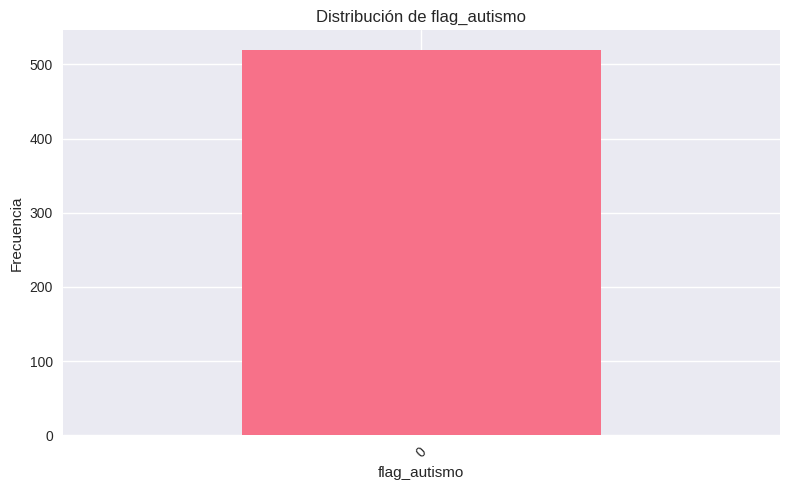

In [19]:
# Identificar posibles variables objetivo (flags, RDS, etc.)
target_candidates = [col for col in df.columns if 'flag' in col.lower() or 'rds' in col.lower() or 'target' in col.lower()]

print("=" * 60)
print("POSIBLES VARIABLES OBJETIVO")
print("=" * 60)
if target_candidates:
    for col in target_candidates:
        print(f"\n{col}:")
        print(df[col].value_counts())
        print(f"Distribución (%):")
        print(df[col].value_counts(normalize=True) * 100)

        # Visualización
        plt.figure(figsize=(8, 5))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No se encontraron variables objetivo obvias. Revisar manualmente las columnas.")
    print("\nColumnas disponibles:")
    for col in df.columns:
        print(f"  - {col}")
